 <a id =6> </a> <br> Start of Notebook

![](fifa.jpg)

## Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('players_20.csv')
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [3]:
data.shape

(18278, 104)

In [4]:
Counter(data.columns)

Counter({'sofifa_id': 1,
         'player_url': 1,
         'short_name': 1,
         'long_name': 1,
         'age': 1,
         'dob': 1,
         'height_cm': 1,
         'weight_kg': 1,
         'nationality': 1,
         'club': 1,
         'overall': 1,
         'potential': 1,
         'value_eur': 1,
         'wage_eur': 1,
         'player_positions': 1,
         'preferred_foot': 1,
         'international_reputation': 1,
         'weak_foot': 1,
         'skill_moves': 1,
         'work_rate': 1,
         'body_type': 1,
         'real_face': 1,
         'release_clause_eur': 1,
         'player_tags': 1,
         'team_position': 1,
         'team_jersey_number': 1,
         'loaned_from': 1,
         'joined': 1,
         'contract_valid_until': 1,
         'nation_position': 1,
         'nation_jersey_number': 1,
         'pace': 1,
         'shooting': 1,
         'passing': 1,
         'dribbling': 1,
         'defending': 1,
         'physic': 1,
         'gk_diving': 

- Lets see all columns via list.

## Data Cleaning

In [5]:
col = list(data.columns)
print(col)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [6]:
null = list(data.isnull().sum())
print(null)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1298, 16779, 240, 240, 17230, 1288, 240, 17152, 17152, 2036, 2036, 2036, 2036, 2036, 2036, 16242, 16242, 16242, 16242, 16242, 16242, 10712, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036]


- Let's look at simple way

In [7]:
data.columns[data.isnull().any()]

Index(['release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

- There's a lot of columns with NAN values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


## Knowing about the each variables

In [9]:
Counter(data['short_name'])

Counter({'L. Messi': 1,
         'Cristiano Ronaldo': 1,
         'Neymar Jr': 1,
         'J. Oblak': 1,
         'E. Hazard': 1,
         'K. De Bruyne': 1,
         'M. ter Stegen': 1,
         'V. van Dijk': 1,
         'L. Modrić': 1,
         'M. Salah': 1,
         'K. Mbappé': 1,
         'K. Koulibaly': 1,
         'H. Kane': 2,
         'Alisson': 1,
         'De Gea': 1,
         'N. Kanté': 1,
         'G. Chiellini': 1,
         'S. Agüero': 1,
         'Sergio Ramos': 1,
         'L. Suárez': 3,
         'R. Lewandowski': 1,
         'Sergio Busquets': 1,
         'A. Griezmann': 1,
         'P. Dybala': 1,
         'P. Pogba': 1,
         'Ederson': 1,
         'R. Sterling': 1,
         'C. Eriksen': 1,
         'T. Courtois': 1,
         'Piqué': 1,
         'S. Handanovič': 1,
         'M. Neuer': 1,
         'H. Lloris': 1,
         'David Silva': 1,
         'E. Cavani': 1,
         'D. Godín': 1,
         'T. Kroos': 1,
         'M. Reus': 1,
         'P. Aubameyan

In [10]:
data['short_name'].value_counts()

J. Rodríguez      11
Paulinho           9
J. García          8
J. Williams        7
J. Hernández       7
                  ..
J. Brekalo         1
Isma Cerro         1
D. Bock            1
D. Cheryshev       1
K. Marsh-Brown     1
Name: short_name, Length: 17354, dtype: int64

- Short names are similar for some players.

In [11]:
Counter(data.duplicated())

Counter({False: 18278})

- There is no duplicate values in this data.

In [12]:
Counter(data['nationality'])

Counter({'Argentina': 886,
         'Portugal': 344,
         'Brazil': 824,
         'Slovenia': 61,
         'Belgium': 268,
         'Germany': 1216,
         'Netherlands': 416,
         'Croatia': 126,
         'Egypt': 30,
         'France': 984,
         'Senegal': 127,
         'England': 1667,
         'Spain': 1035,
         'Italy': 732,
         'Uruguay': 164,
         'Poland': 324,
         'Denmark': 345,
         'Gabon': 16,
         'Korea Republic': 322,
         'Costa Rica': 30,
         'Slovakia': 54,
         'Bosnia Herzegovina': 66,
         'Serbia': 139,
         'Scotland': 277,
         'Hungary': 35,
         'Switzerland': 229,
         'Greece': 96,
         'Austria': 319,
         'Morocco': 94,
         'Sweden': 358,
         'Wales': 117,
         'Colombia': 591,
         'Czech Republic': 102,
         'Chile': 370,
         'Algeria': 50,
         'Ivory Coast': 105,
         'Togo': 13,
         'Norway': 350,
         'Mexico': 340,
         

In [13]:
Counter(data['club'])

Counter({'FC Barcelona': 33,
         'Juventus': 33,
         'Paris Saint-Germain': 33,
         'Atlético Madrid': 33,
         'Real Madrid': 33,
         'Manchester City': 33,
         'Liverpool': 33,
         'Napoli': 31,
         'Tottenham Hotspur': 33,
         'Manchester United': 33,
         'Chelsea': 33,
         'FC Bayern München': 23,
         'Inter': 30,
         'Borussia Dortmund': 31,
         'Arsenal': 33,
         'Valencia CF': 33,
         'Lazio': 33,
         'Milan': 29,
         'Sporting CP': 30,
         'Olympique Lyonnais': 29,
         'RB Leipzig': 33,
         'Ajax': 30,
         'LA Galaxy': 27,
         'Atalanta': 28,
         'RC Celta': 33,
         'Bayer 04 Leverkusen': 25,
         'Real Betis': 31,
         'FC Porto': 30,
         'SV Werder Bremen': 32,
         'West Ham United': 33,
         'Wolverhampton Wanderers': 33,
         'AS Saint-Étienne': 32,
         'Torino': 29,
         'Dalian YiFang FC': 28,
         'Borussia Mön

## Let's create a function to check about single player details.

In [14]:
def playerinfo(x):
    return data.loc[x,:]
x = playerinfo(0)    # id = 0 -- > Lionel Messi
pd.set_option('display.max_rows',200)
x = pd.DataFrame(x)
print(x)

                                                                            0
sofifa_id                                                              158023
player_url                  https://sofifa.com/player/158023/lionel-messi/...
short_name                                                           L. Messi
long_name                                      Lionel Andrés Messi Cuccittini
age                                                                        32
dob                                                                1987-06-24
height_cm                                                                 170
weight_kg                                                                  72
nationality                                                         Argentina
club                                                             FC Barcelona
overall                                                                    94
potential                                                       

In [15]:
delete = ['sofifa_id','player_url','long_name','dob','body_type','real_face','nation_position','player_tags',
          'nation_jersey_number','loaned_from','contract_valid_until','team_jersey_number','player_traits']

- These columns are not needed anyway.

In [16]:
data.drop(delete,axis = 1,inplace = True)

In [17]:
data.shape

(18278, 91)

In [18]:
data[['short_name','player_positions']]

,short_name,player_positions
0,L. Messi,"RW, CF, ST"
1,Cristiano Ronaldo,"ST, LW"
2,Neymar Jr,"LW, CAM"
3,J. Oblak,GK
4,E. Hazard,"LW, CF"
...,...,...
18273,Shao Shuai,CB
18274,Xiao Mingjie,CB
18275,Zhang Wei,CM
18276,Wang Haijian,CM


In [19]:
data['BMI'] = data['weight_kg'] / (data['height_cm']/100) **2

- Creating a new column BMI combining both height and weight.

In [20]:
data['BMI']

0        24.913495
1        23.735308
2        22.204082
3        24.615211
4        24.163265
           ...    
18273    22.835010
18274    21.066743
18275    21.678807
18276    21.621622
18277    23.547881
Name: BMI, Length: 18278, dtype: float64

In [21]:
data.drop(['height_cm','weight_kg'],axis = 1,inplace = True)

In [22]:
data.head(2)

,short_name,age,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
0,L. Messi,32,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,...,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,24.913495
1,Cristiano Ronaldo,34,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,23.735308


In [23]:
positions = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm',
           'rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

In [24]:
data[positions].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [25]:
for pos in positions:
    data[pos]=data[pos].str.split('+',n=1,expand = True)[0]

data[positions]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,...,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,...,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,...,66,61,61,61,66,61,46,46,46,61
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83,83,83,89,88,88,88,89,89,89,...,66,63,63,63,66,61,49,49,49,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,32,32,32,31,31,31,31,31,31,31,...,43,42,42,42,43,45,46,46,46,45
18274,33,33,33,33,32,32,32,33,33,33,...,44,43,43,43,44,46,47,47,47,46
18275,43,43,43,43,43,43,43,43,44,44,...,47,49,49,49,47,47,49,49,49,47
18276,43,43,43,45,44,44,44,45,46,46,...,48,48,48,48,48,48,49,49,49,48


In [26]:
data[positions].isnull().sum()

ls     2036
st     2036
rs     2036
lw     2036
lf     2036
cf     2036
rf     2036
rw     2036
lam    2036
cam    2036
ram    2036
lm     2036
lcm    2036
cm     2036
rcm    2036
rm     2036
lwb    2036
ldm    2036
cdm    2036
rdm    2036
rwb    2036
lb     2036
lcb    2036
cb     2036
rcb    2036
rb     2036
dtype: int64

In [27]:
data[positions] = data[positions].fillna(0)

- All this nan values are in goal keepers and so i am filling with '0' rather than mean because GK doesn't have any other player positions.

In [28]:
data[positions].isnull().sum()

ls     0
st     0
rs     0
lw     0
lf     0
cf     0
rf     0
rw     0
lam    0
cam    0
ram    0
lm     0
lcm    0
cm     0
rcm    0
rm     0
lwb    0
ldm    0
cdm    0
rdm    0
rwb    0
lb     0
lcb    0
cb     0
rcb    0
rb     0
dtype: int64

In [29]:
data[positions].dtypes

ls     object
st     object
rs     object
lw     object
lf     object
cf     object
rf     object
rw     object
lam    object
cam    object
ram    object
lm     object
lcm    object
cm     object
rcm    object
rm     object
lwb    object
ldm    object
cdm    object
rdm    object
rwb    object
lb     object
lcb    object
cb     object
rcb    object
rb     object
dtype: object

In [30]:
data[positions] = data[positions].astype(int)

In [31]:
data[positions].dtypes

ls     int32
st     int32
rs     int32
lw     int32
lf     int32
cf     int32
rf     int32
rw     int32
lam    int32
cam    int32
ram    int32
lm     int32
lcm    int32
cm     int32
rcm    int32
rm     int32
lwb    int32
ldm    int32
cdm    int32
rdm    int32
rwb    int32
lb     int32
lcb    int32
cb     int32
rcb    int32
rb     int32
dtype: object

- hereby cleaned the data for positions of the players (Eg : rs,lw,st,cb)

In [32]:
null = list(data.isnull().sum())
print(null)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1298, 240, 1288, 2036, 2036, 2036, 2036, 2036, 2036, 16242, 16242, 16242, 16242, 16242, 16242, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [33]:
data.columns[data.isnull().any()]

Index(['release_clause_eur', 'team_position', 'joined', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning'],
      dtype='object')

- Let's take care of this each column.

In [34]:
data['release_clause_eur'].fillna(method = 'ffill',inplace = True)

In [35]:
data['team_position'].fillna(method = 'bfill',inplace = True)

In [36]:
data['joined'].fillna(method = 'ffill',inplace = True)

In [37]:
skills = ['pace','shooting','passing','dribbling','defending','physic']

In [38]:
data[skills].head()

,pace,shooting,passing,dribbling,defending,physic
0,87.0,92.0,92.0,96.0,39.0,66.0
1,90.0,93.0,82.0,89.0,35.0,78.0
2,91.0,85.0,87.0,95.0,32.0,58.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,83.0,86.0,94.0,35.0,66.0


In [39]:
data[skills].isnull().sum()

pace         2036
shooting     2036
passing      2036
dribbling    2036
defending    2036
physic       2036
dtype: int64

In [40]:
for skill in skills:
    data[skill] = data[skill].fillna(data[skill].median())
data[skills]

,pace,shooting,passing,dribbling,defending,physic
0,87.0,92.0,92.0,96.0,39.0,66.0
1,90.0,93.0,82.0,89.0,35.0,78.0
2,91.0,85.0,87.0,95.0,32.0,58.0
3,69.0,54.0,58.0,64.0,56.0,66.0
4,91.0,83.0,86.0,94.0,35.0,66.0
...,...,...,...,...,...,...
18273,57.0,23.0,28.0,33.0,47.0,51.0
18274,58.0,24.0,33.0,35.0,48.0,48.0
18275,54.0,35.0,44.0,45.0,48.0,51.0
18276,59.0,35.0,47.0,47.0,45.0,52.0


In [41]:
data[skills].isnull().sum()

pace         0
shooting     0
passing      0
dribbling    0
defending    0
physic       0
dtype: int64

In [42]:
gk_skills = ['gk_diving','gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed','gk_positioning']

In [43]:
data[gk_skills].head()

,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,87.0,92.0,78.0,89.0,52.0,90.0
4,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
data[gk_skills].isnull().sum()

gk_diving         16242
gk_handling       16242
gk_kicking        16242
gk_reflexes       16242
gk_speed          16242
gk_positioning    16242
dtype: int64

In [45]:
data[gk_skills].dtypes

gk_diving         float64
gk_handling       float64
gk_kicking        float64
gk_reflexes       float64
gk_speed          float64
gk_positioning    float64
dtype: object

In [46]:
for skill in gk_skills:
    data[skill] = data[skill].fillna(data[skill].fillna(0))
data[gk_skills]

,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,87.0,92.0,78.0,89.0,52.0,90.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
18273,0.0,0.0,0.0,0.0,0.0,0.0
18274,0.0,0.0,0.0,0.0,0.0,0.0
18275,0.0,0.0,0.0,0.0,0.0,0.0
18276,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
data[gk_skills].isnull().sum()

gk_diving         0
gk_handling       0
gk_kicking        0
gk_reflexes       0
gk_speed          0
gk_positioning    0
dtype: int64

In [48]:
null = list(data.isnull().sum())
print(null)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


- There is no null value in any of the column.

In [49]:
data.to_csv("fifa.csv",index = False)

## Exploratory Data Analysis

In [50]:
data = pd.read_csv('fifa.csv')
data.head()

,short_name,age,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
0,L. Messi,32,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,...,66,66,66,68,63,52,52,52,63,24.913495
1,Cristiano Ronaldo,34,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,...,61,61,61,65,61,53,53,53,61,23.735308
2,Neymar Jr,27,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,...,61,61,61,66,61,46,46,46,61,22.204082
3,J. Oblak,26,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,...,0,0,0,0,0,0,0,0,0,24.615211
4,E. Hazard,28,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,...,63,63,63,66,61,49,49,49,61,24.163265


In [51]:
Counter(data.columns)

Counter({'short_name': 1,
         'age': 1,
         'nationality': 1,
         'club': 1,
         'overall': 1,
         'potential': 1,
         'value_eur': 1,
         'wage_eur': 1,
         'player_positions': 1,
         'preferred_foot': 1,
         'international_reputation': 1,
         'weak_foot': 1,
         'skill_moves': 1,
         'work_rate': 1,
         'release_clause_eur': 1,
         'team_position': 1,
         'joined': 1,
         'pace': 1,
         'shooting': 1,
         'passing': 1,
         'dribbling': 1,
         'defending': 1,
         'physic': 1,
         'gk_diving': 1,
         'gk_handling': 1,
         'gk_kicking': 1,
         'gk_reflexes': 1,
         'gk_speed': 1,
         'gk_positioning': 1,
         'attacking_crossing': 1,
         'attacking_finishing': 1,
         'attacking_heading_accuracy': 1,
         'attacking_short_passing': 1,
         'attacking_volleys': 1,
         'skill_dribbling': 1,
         'skill_curve': 1,
        

In [52]:
data.shape

(18278, 90)

In [53]:
null = list(data.isnull().sum())
print(null)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [54]:
data.describe()

,age,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
count,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.723777e+06,67.845607,...,50.413886,50.413886,50.413886,51.002900,50.359613,49.296203,49.296203,49.296203,50.359613,22.858347
std,4.656964,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.079730e+07,10.657660,...,20.255338,20.255338,20.255338,19.964329,19.991826,20.685366,20.685366,20.685366,19.991826,1.366118
min,16.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.043303
25%,22.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.740000e+05,63.000000,...,46.000000,46.000000,46.000000,48.000000,46.000000,42.000000,42.000000,42.000000,46.000000,21.967858
50%,25.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,1.300000e+06,69.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,55.000000,55.000000,55.000000,56.000000,22.857143
75%,29.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,3.000000,3.800000e+06,74.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,64.000000,64.000000,64.000000,63.000000,23.719609
max,42.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,5.000000,1.958000e+08,96.000000,...,87.000000,87.000000,87.000000,85.000000,84.000000,87.000000,87.000000,87.000000,84.000000,34.717839


### Let's check for Indian players

In [55]:
df = pd.DataFrame(data)

In [56]:
def country(x):
    return df[df['nationality'] == x][['team_position','short_name','overall','potential','player_positions','club']].style.background_gradient('inferno')
country('India')

,team_position,short_name,overall,potential,player_positions,club
12155,ST,G. Chatterjee,64,64,GK,India
13102,RES,P. Bhatt,63,63,ST,India
13103,RES,B. Raj,63,63,RB,India
13970,SUB,A. Chakraborty,62,62,CB,India
13971,SUB,H. Bhandari,62,62,"RM, LM",India
13972,SUB,A. Swaminathan,62,62,"CAM, LM",India
14625,SUB,D. Pillai,61,61,"RM, RW",India
15204,SUB,A. Ginti,60,62,"LB, LM",India
15205,SUB,A. Khurana,60,62,CB,India
15321,SUB,A. Deshpande,60,60,LM,India


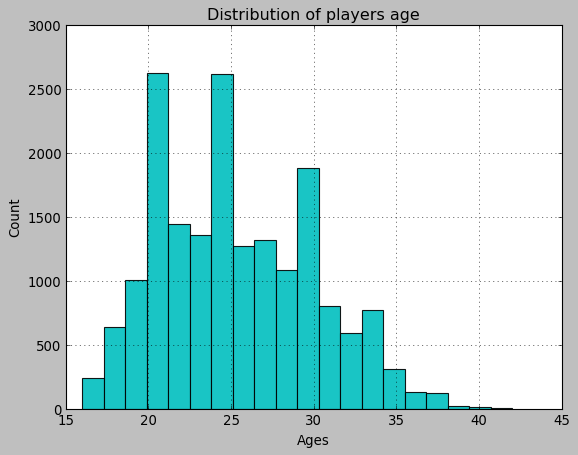

In [57]:
rcParams['figure.figsize'] = 10,5
plt.style.use('_classic_test')
ax = df['age'].hist(bins = 20,alpha = 0.9,color = 'c')
ax.set(xlabel = 'Ages',ylabel = 'Count', title = "Distribution of players age")
plt.show()

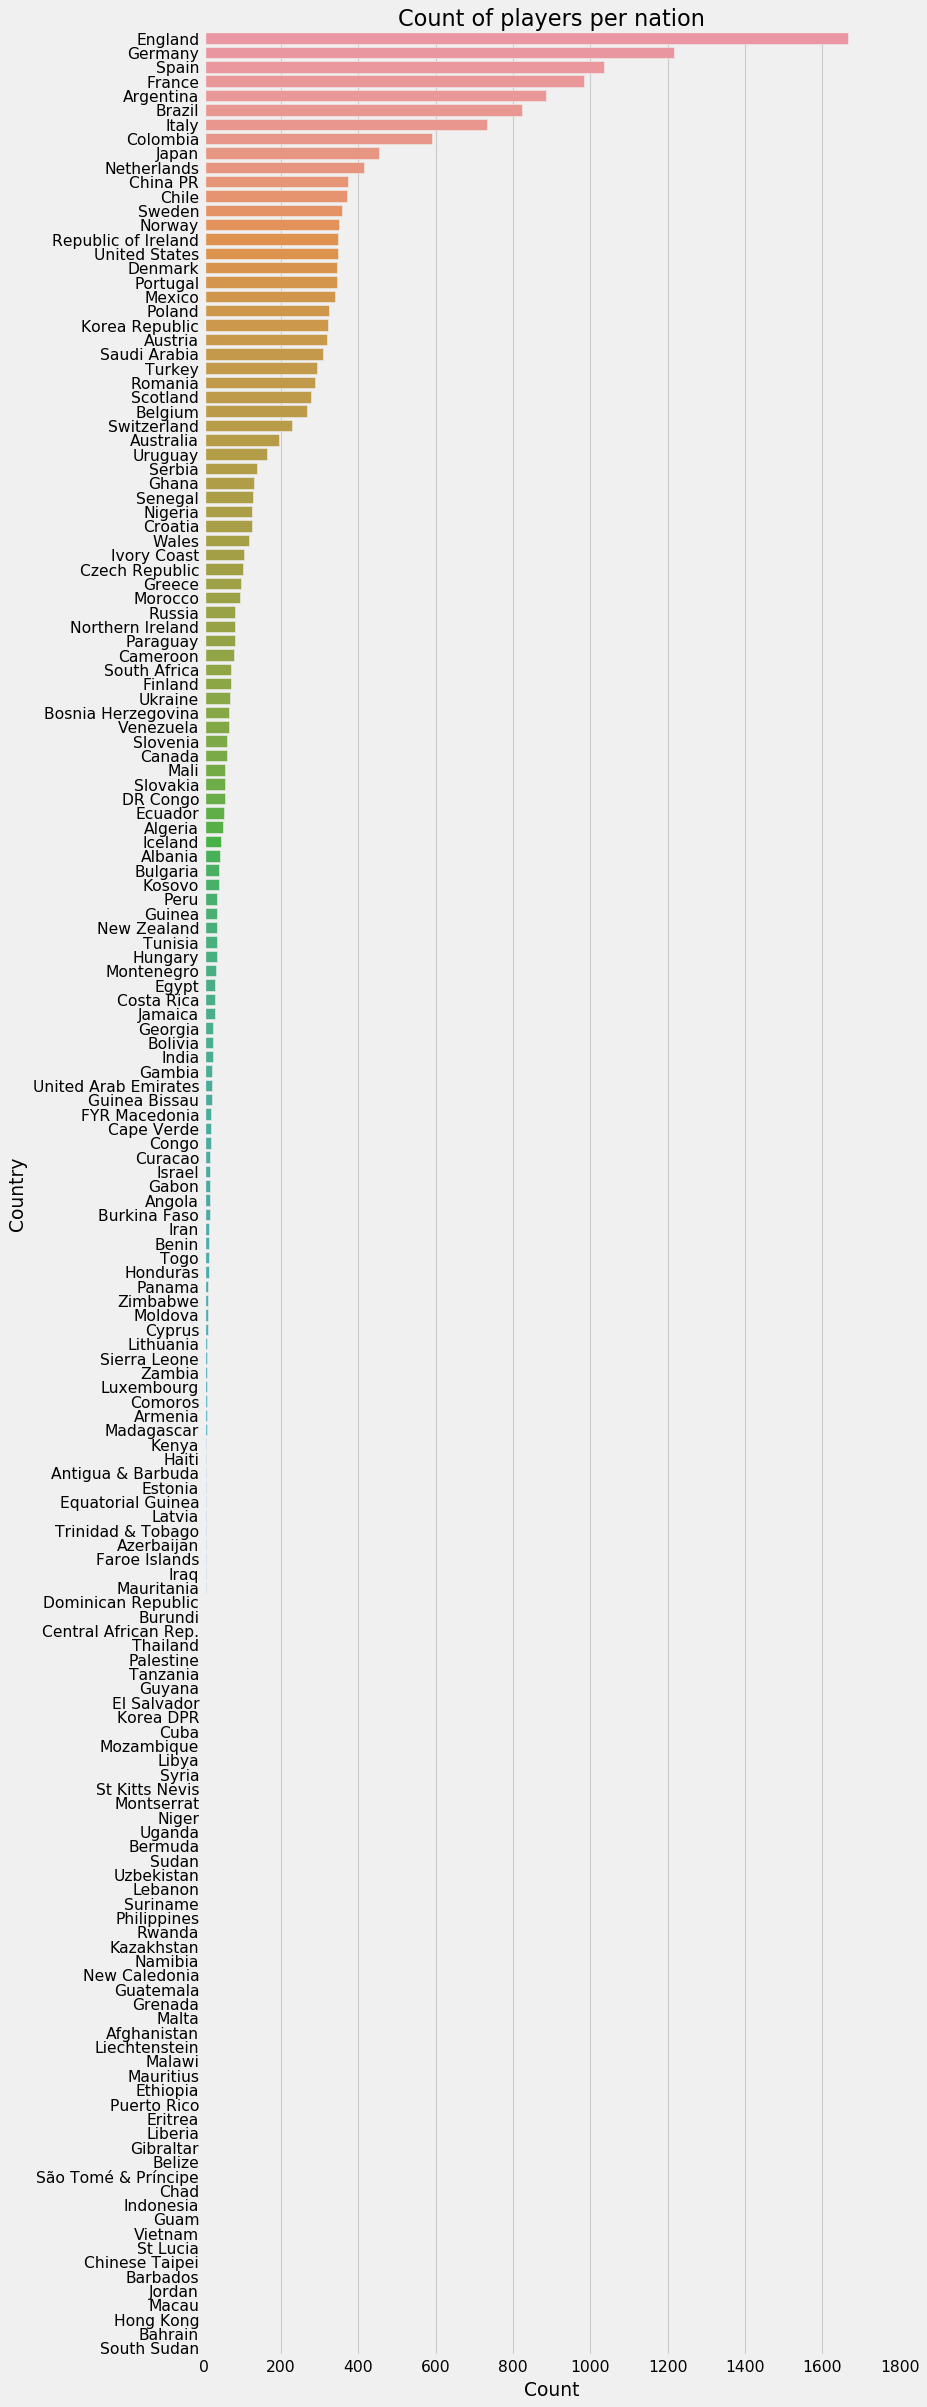

In [58]:
rcParams['figure.figsize'] = 10,35
plt.style.use('fivethirtyeight')
sb.barplot(x = df['nationality'].value_counts().values,y = df['nationality'].value_counts().index)
plt.title('Count of players per nation')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

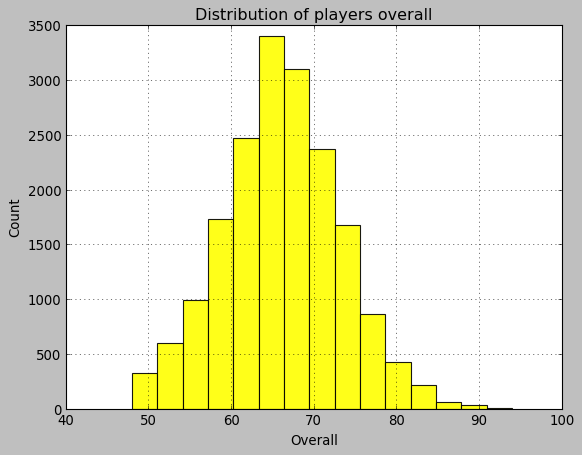

In [59]:
rcParams['figure.figsize'] = 10,5
plt.style.use('_classic_test')
ax = df['overall'].hist(bins = 15,alpha = 0.9,color = 'yellow')
ax.set(xlabel = 'Overall',ylabel = 'Count', title = "Distribution of players overall")
plt.show()

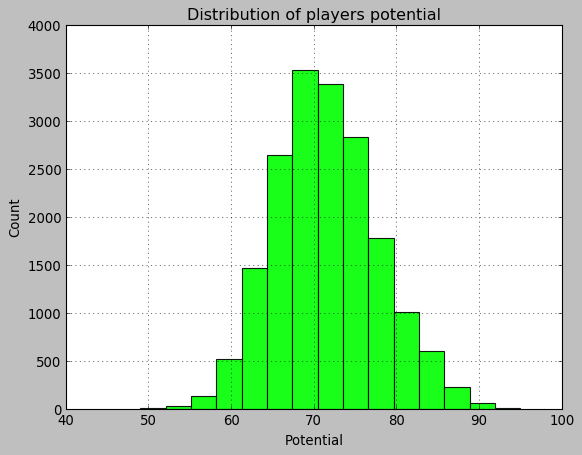

In [60]:
rcParams['figure.figsize'] = 10,5
plt.style.use('_classic_test')
ax = df['potential'].hist(bins = 15,alpha = 0.9,color = 'lime')
ax.set(xlabel = 'Potential',ylabel = 'Count', title = "Distribution of players potential")
plt.show()

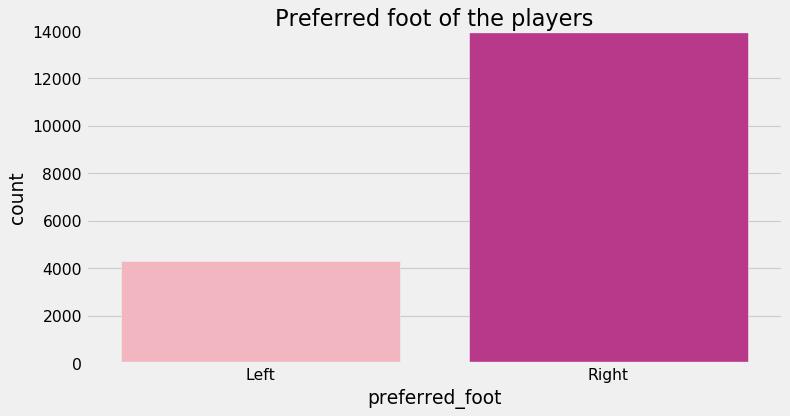

In [61]:
rcParams['figure.figsize'] = 10,5
plt.style.use('fivethirtyeight')
sb.countplot(df['preferred_foot'],palette = 'RdPu')
plt.title('Preferred foot of the players')
plt.show()

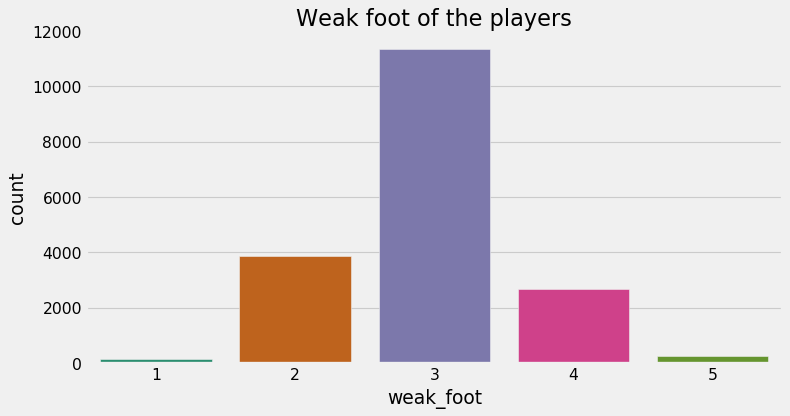

In [62]:
rcParams['figure.figsize'] = 10,5
plt.style.use('fivethirtyeight')
sb.countplot(df['weak_foot'],palette = 'Dark2')
plt.title('Weak foot of the players')
plt.show()

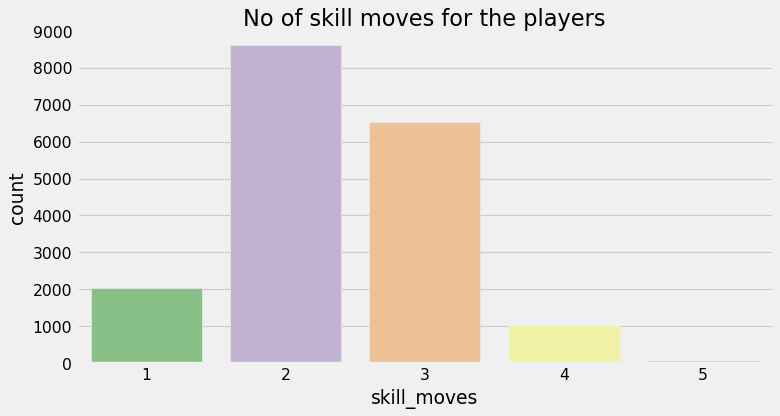

In [63]:
rcParams['figure.figsize'] = 10,5
plt.style.use('fivethirtyeight')
sb.countplot(df['skill_moves'],palette = 'Accent')
plt.title('No of skill moves for the players')
plt.show()

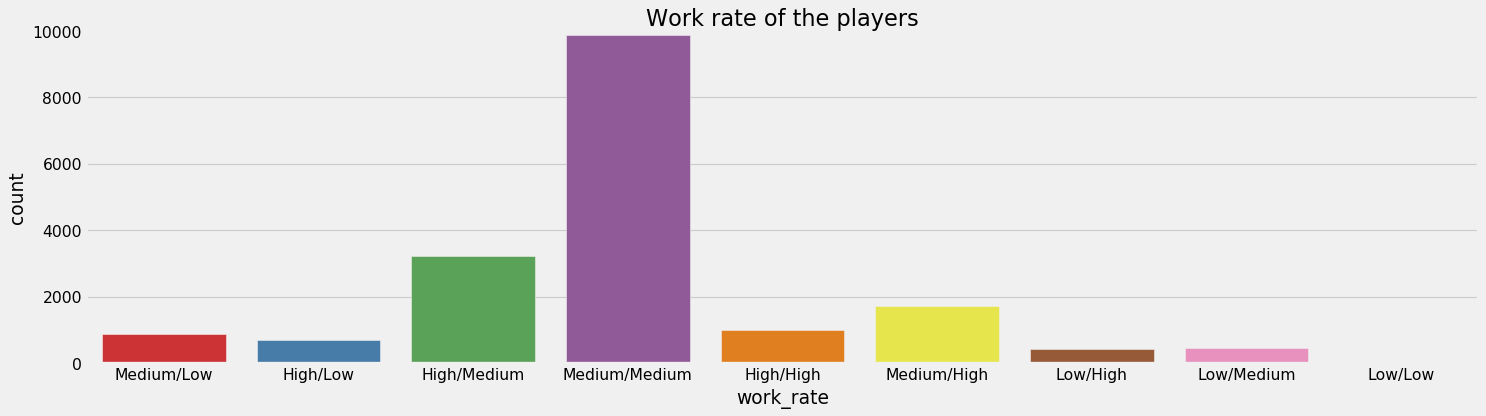

In [64]:
rcParams['figure.figsize'] = 20,5
plt.style.use('fivethirtyeight')
sb.countplot(df['work_rate'],palette = 'Set1')
plt.title('Work rate of the players')
plt.show()

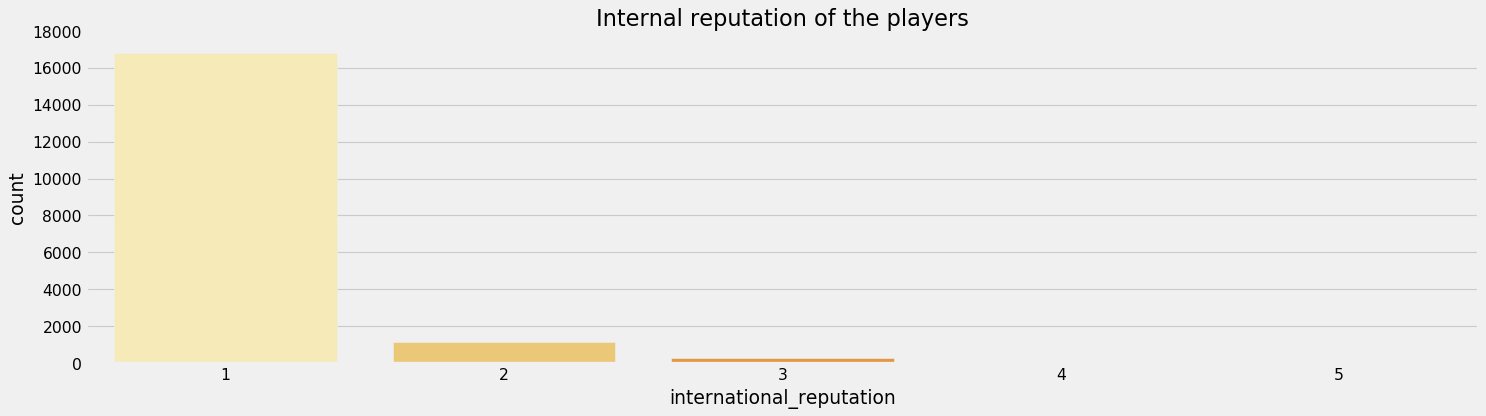

In [65]:
rcParams['figure.figsize'] = 20,5
plt.style.use('fivethirtyeight')
sb.countplot(df['international_reputation'],palette = 'YlOrBr')
plt.title('Internal reputation of the players')
plt.show()

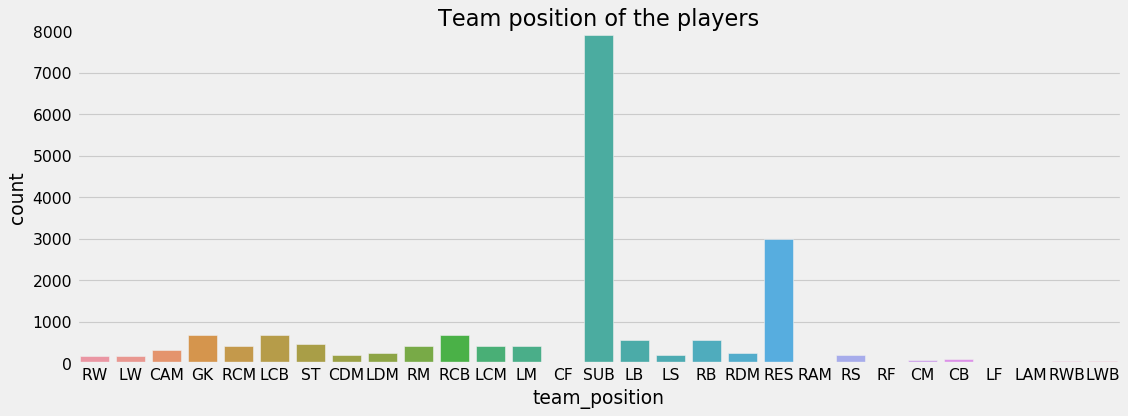

In [66]:
rcParams['figure.figsize'] = 15,5
plt.style.use('fivethirtyeight')
sb.countplot(df['team_position'])
plt.title('Team position of the players')
plt.show()

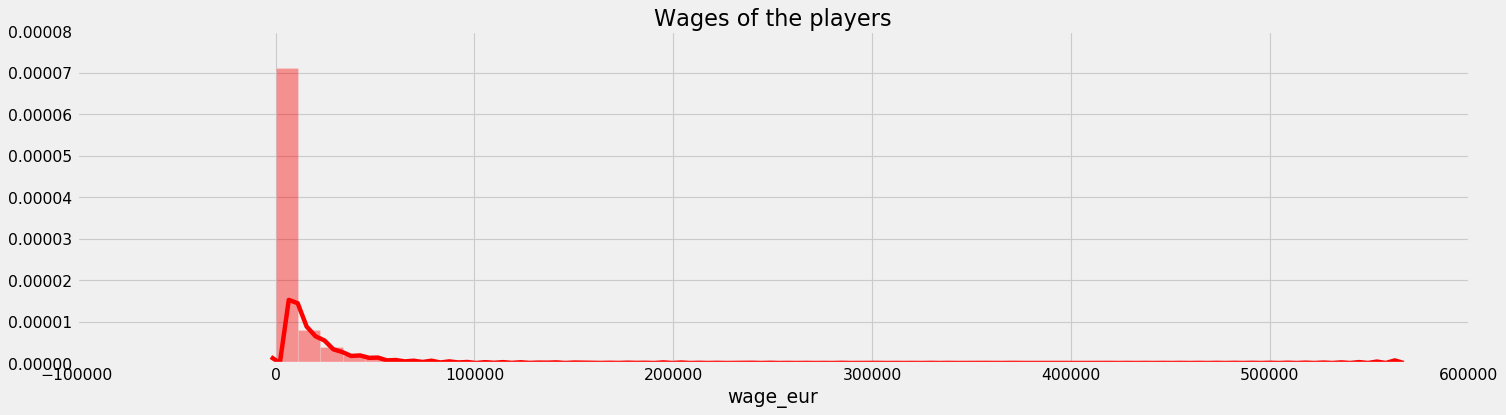

In [67]:
rcParams['figure.figsize'] = 20,5
plt.style.use('fivethirtyeight')
sb.distplot(df['wage_eur'],color = 'red')
plt.title('Wages of the players')
plt.show()

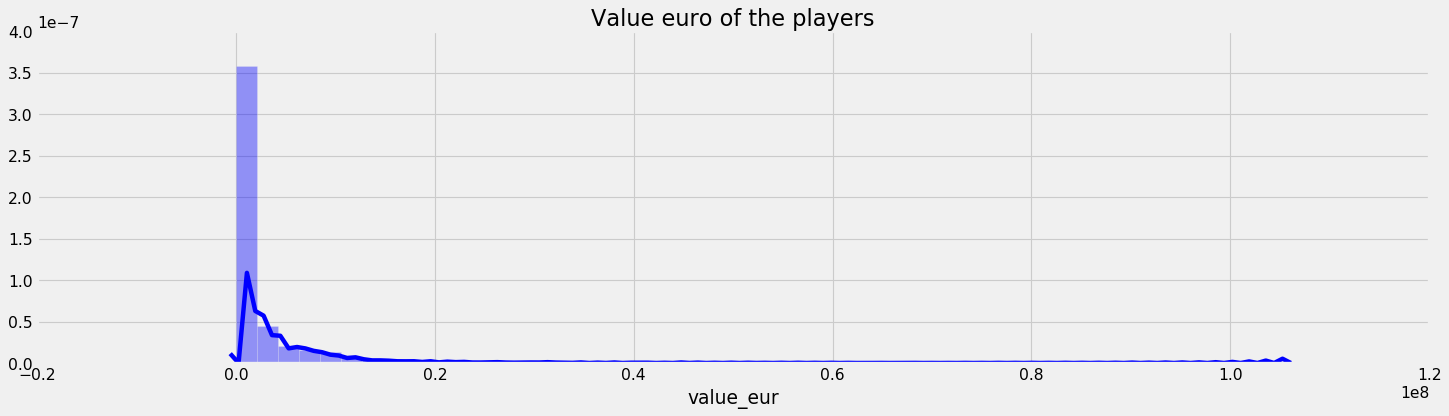

In [68]:
rcParams['figure.figsize'] = 20,5
plt.style.use('fivethirtyeight')
sb.distplot(df['value_eur'],color = 'blue')
plt.title('Value euro of the players')
plt.show()

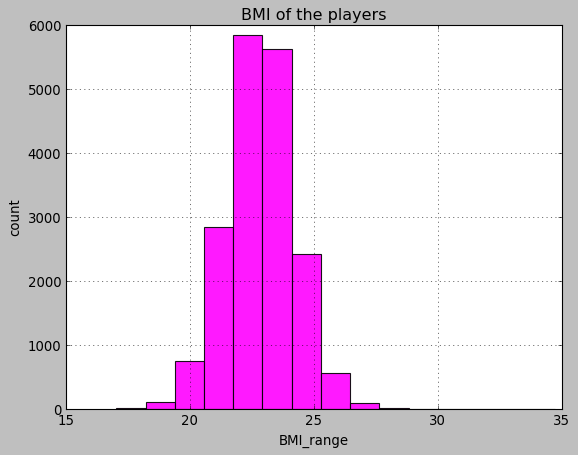

In [69]:
rcParams['figure.figsize'] = 20,5
plt.style.use('_classic_test')
ax = df['BMI'].hist(bins = 15,alpha = 0.9,color = 'fuchsia')
ax.set(title = 'BMI of the players',xlabel = 'BMI_range',ylabel = 'count')
plt.show()

### Best player per each position

In [70]:
df.iloc[df.groupby(df['team_position'])['overall'].idxmax()][['team_position','short_name','age','overall','club','nationality']].style.background_gradient('prism')

,team_position,short_name,age,overall,club,nationality
2,CAM,Neymar Jr,27,92,Paris Saint-Germain,Brazil
126,CB,S. de Vrij,27,84,Inter,Netherlands
21,CDM,Sergio Busquets,30,89,FC Barcelona,Spain
46,CF,K. Benzema,31,87,Real Madrid,France
123,CM,Luis Alberto,26,84,Lazio,Spain
3,GK,J. Oblak,26,91,Atlético Madrid,Slovenia
306,LAM,Taison,31,82,Shakhtar Donetsk,Brazil
51,LB,Jordi Alba,30,87,FC Barcelona,Spain
7,LCB,V. van Dijk,27,90,Liverpool,Netherlands
33,LCM,David Silva,33,88,Manchester City,Spain


### Potential player per each position

In [71]:
df.iloc[df.groupby(df['team_position'])['potential'].idxmax()][['team_position','short_name','age','potential','club','nationality']].style.background_gradient('flag')

,team_position,short_name,age,potential,club,nationality
2,CAM,Neymar Jr,27,92,Paris Saint-Germain,Brazil
573,CB,I. Konaté,20,88,RB Leipzig,France
21,CDM,Sergio Busquets,30,89,FC Barcelona,Spain
46,CF,K. Benzema,31,87,Real Madrid,France
245,CM,Rúben Neves,22,87,Wolverhampton Wanderers,Portugal
3,GK,J. Oblak,26,93,Atlético Madrid,Slovenia
340,LAM,David Neres,22,86,Ajax,Brazil
82,LB,A. Robertson,25,89,Liverpool,Scotland
7,LCB,V. van Dijk,27,91,Liverpool,Netherlands
75,LCM,F. de Jong,22,91,FC Barcelona,Netherlands


### Top 10 youngest players

In [72]:
df.sort_values('age',ascending = True)[['short_name','team_position','age','club','nationality']].head(10).style.background_gradient('brg')

,short_name,team_position,age,club,nationality
18171,J. Starbuck,RES,16,Grimsby Town,England
4764,A. Hložek,RM,16,Sparta Praha,Czech Republic
18243,E. Sartorius,SUB,16,Lincoln City,England
17827,D. Burns,SUB,16,St. Patrick's Athletic,Northern Ireland
17614,D. Obbekjær,SUB,16,Odense Boldklub,Denmark
17782,S. Anderson,SUB,16,Colorado Rapids,United States
18242,R. Wikberg,RES,16,Östersunds FK,Sweden
18031,O. Stefánsson,RES,16,IFK Norrköping,Iceland
14626,A. Velasco,SUB,16,Independiente,Argentina
12160,S. Esposito,SUB,16,Inter,Italy


### Top 10 eldest players

In [73]:
df.sort_values('age',ascending = False)[['short_name','team_position','age','club','nationality']].head(10).style.background_gradient('brg')

,short_name,team_position,age,club,nationality
13003,H. Sulaimani,LB,42,Al Ahli,Saudi Arabia
11832,C. Muñoz,GK,42,CD Universidad de Concepción,Argentina
200,G. Buffon,SUB,41,Juventus,Italy
3706,C. Lucchetti,GK,41,Atlético Tucumán,Argentina
10665,F. Kippe,LCB,41,Lillestrøm SK,Norway
868,Hilton,CB,41,Montpellier HSC,Brazil
2965,Cifuentes,GK,40,Cádiz CF,Spain
15812,M. Gurski,RES,40,SpVgg Unterhaching,Germany
8359,F. Cubero,RES,40,Vélez Sarsfield,Argentina
2963,D. Dainelli,SUB,40,Livorno,Italy


In [74]:
df['joined'].head()

0    2004-07-01
1    2018-07-10
2    2017-08-03
3    2014-07-16
4    2019-07-01
Name: joined, dtype: object

### Top 10 left foot players

In [75]:
df[df['preferred_foot'] == 'Left'][['short_name','age','overall','club','nationality']].head(10).style.background_gradient('rainbow')

,short_name,age,overall,club,nationality
0,L. Messi,32,94,FC Barcelona,Argentina
9,M. Salah,27,90,Liverpool,Egypt
16,G. Chiellini,34,89,Juventus,Italy
22,A. Griezmann,28,89,FC Barcelona,France
23,P. Dybala,25,88,Juventus,Argentina
25,Ederson,25,88,Manchester City,Brazil
28,T. Courtois,27,88,Real Madrid,Belgium
32,H. Lloris,32,88,Tottenham Hotspur,France
33,David Silva,33,88,Manchester City,Spain
40,A. Laporte,25,87,Manchester City,France


### Top 10 right foot players

In [76]:
df[df['preferred_foot'] == 'Right'][['short_name','age','overall','club','nationality']].head(10).style.background_gradient('jet')

,short_name,age,overall,club,nationality
1,Cristiano Ronaldo,34,93,Juventus,Portugal
2,Neymar Jr,27,92,Paris Saint-Germain,Brazil
3,J. Oblak,26,91,Atlético Madrid,Slovenia
4,E. Hazard,28,91,Real Madrid,Belgium
5,K. De Bruyne,28,91,Manchester City,Belgium
6,M. ter Stegen,27,90,FC Barcelona,Germany
7,V. van Dijk,27,90,Liverpool,Netherlands
8,L. Modrić,33,90,Real Madrid,Croatia
10,K. Mbappé,20,89,Paris Saint-Germain,France
11,K. Koulibaly,28,89,Napoli,Senegal


### No of country players in club

In [77]:
df.groupby(df['club'])['nationality'].nunique().sort_values(ascending = False).head(10)

club
Newcastle United          19
Leicester City            19
Lazio                     19
Udinese                   19
Brighton & Hove Albion    18
AS Monaco                 18
Watford                   18
Everton                   18
Eintracht Frankfurt       17
Arsenal                   17
Name: nationality, dtype: int64

### Features of players

In [78]:
skills = ('pace','shooting','passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking',
          'gk_reflexes','gk_speed','gk_positioning','attacking_crossing','attacking_finishing','attacking_heading_accuracy',
          'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy',
          'skill_long_passing','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions',
          'movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots',
          'mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties',
          'mentality_composure','defending_marking','defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving',
          'goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes')

In [79]:
for i, val in df.groupby(df['team_position'])[skills].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: movement_agility, movement_balance, dribbling
Position CB: power_strength, physic, power_jumping
Position CDM: power_stamina, physic, attacking_short_passing
Position CF: skill_dribbling, dribbling, mentality_positioning
Position CM: power_stamina, attacking_short_passing, physic
Position GK: goalkeeping_reflexes, gk_reflexes, goalkeeping_diving
Position LAM: movement_agility, movement_acceleration, pace
Position LB: power_stamina, movement_sprint_speed, pace
Position LCB: power_strength, physic, power_jumping
Position LCM: power_stamina, movement_balance, attacking_short_passing
Position LDM: power_stamina, physic, attacking_short_passing
Position LF: movement_agility, movement_balance, movement_acceleration
Position LM: movement_acceleration, pace, movement_sprint_speed
Position LS: power_strength, movement_sprint_speed, pace
Position LW: movement_acceleration, movement_agility, pace
Position LWB: movement_sprint_speed, pace, movement_acceleration
Position RAM: movement

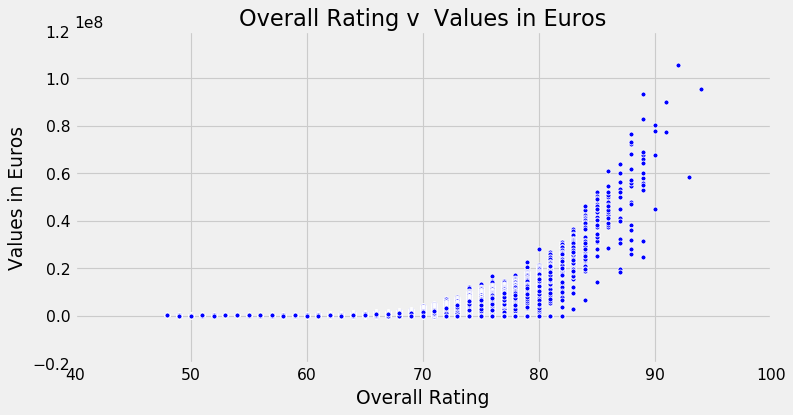

In [80]:
rcParams['figure.figsize'] = 10,5
plt.style.use('fivethirtyeight')
x=df['overall']
y=df['value_eur']
sb.scatterplot(x,y)
plt.title('Overall Rating v  Values in Euros')
plt.xlabel('Overall Rating')
plt.ylabel('Values in Euros')
plt.show()

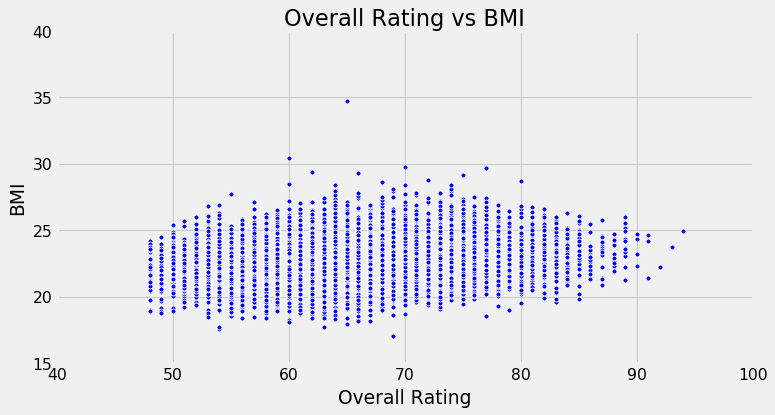

In [81]:
rcParams['figure.figsize'] = 10,5
plt.style.use('fivethirtyeight')
x=df['overall']
y=df['BMI']
sb.scatterplot(x,y)
plt.title('Overall Rating vs BMI')
plt.xlabel('Overall Rating')
plt.ylabel('BMI')
plt.show()

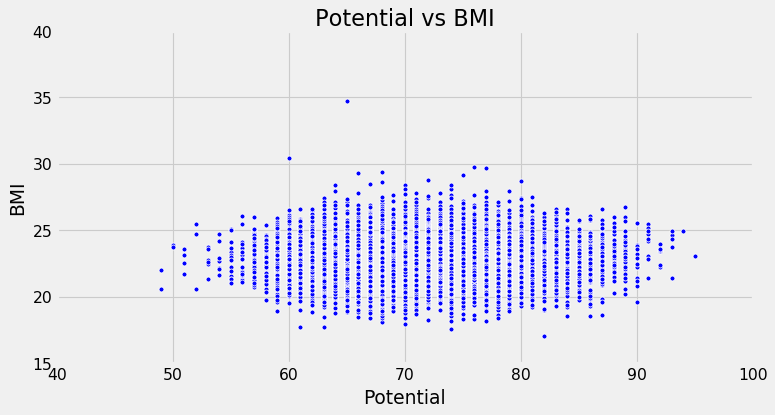

In [82]:
rcParams['figure.figsize'] = 10,5
plt.style.use('fivethirtyeight')
x=df['potential']
y=df['BMI']
sb.scatterplot(x,y)
plt.title('Potential vs BMI')
plt.xlabel('Potential')
plt.ylabel('BMI')
plt.show()

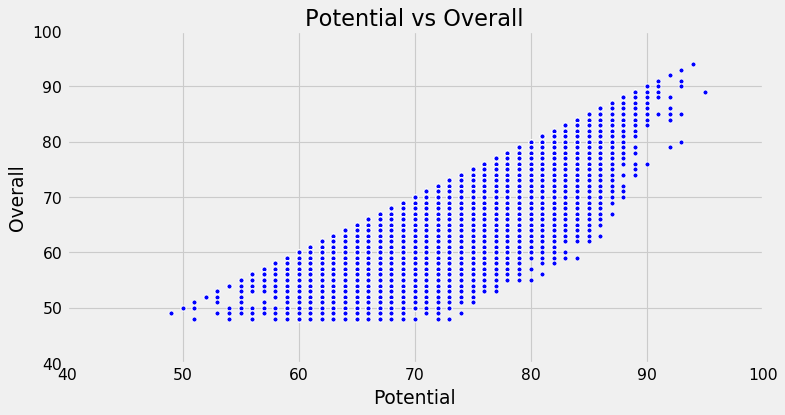

In [83]:
rcParams['figure.figsize'] = 10,5
plt.style.use('fivethirtyeight')
x=df['potential']
y=df['overall']
sb.scatterplot(x,y)
plt.title('Potential vs Overall')
plt.xlabel('Potential')
plt.ylabel('Overall')
plt.show()

## Top 50 analysis

In [84]:
top_50 = df.head(50)
top_50

,short_name,age,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
0,L. Messi,32,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,...,66,66,66,68,63,52,52,52,63,24.913495
1,Cristiano Ronaldo,34,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,...,61,61,61,65,61,53,53,53,61,23.735308
2,Neymar Jr,27,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,...,61,61,61,66,61,46,46,46,61,22.204082
3,J. Oblak,26,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,...,0,0,0,0,0,0,0,0,0,24.615211
4,E. Hazard,28,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,...,63,63,63,66,61,49,49,49,61,24.163265
5,K. De Bruyne,28,Belgium,Manchester City,91,91,90000000,370000,"CAM, CM",Right,...,77,77,77,77,73,66,66,66,73,21.366869
6,M. ter Stegen,27,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,...,0,0,0,0,0,0,0,0,0,24.307244
7,V. van Dijk,27,Netherlands,Liverpool,90,91,78000000,200000,CB,Right,...,83,83,83,79,81,87,87,87,81,24.698650
8,L. Modrić,33,Croatia,Real Madrid,90,90,45000000,340000,CM,Right,...,81,81,81,81,79,72,72,72,79,22.309356
9,M. Salah,27,Egypt,Liverpool,90,90,80500000,240000,"RW, ST",Left,...,67,67,67,70,66,57,57,57,66,23.183673


In [85]:
top_50.shape

(50, 90)

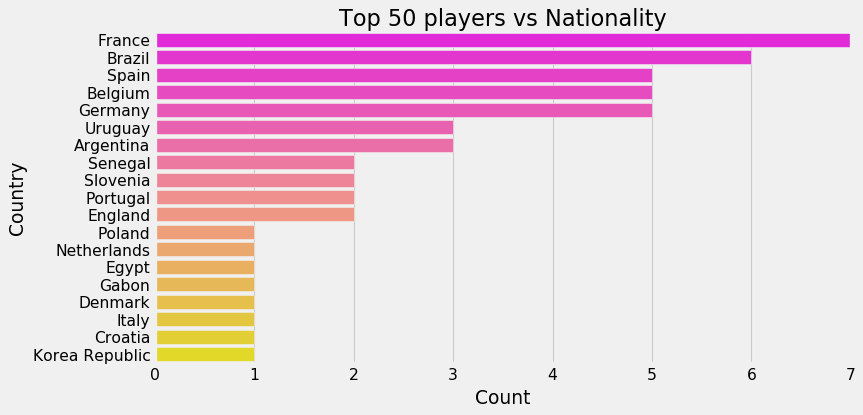

In [86]:
rcParams['figure.figsize'] = 10,5
plt.style.use('fivethirtyeight')
sb.barplot(x = top_50['nationality'].value_counts().values,y = top_50['nationality'].value_counts().index,palette='spring')
plt.title('Top 50 players vs Nationality')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

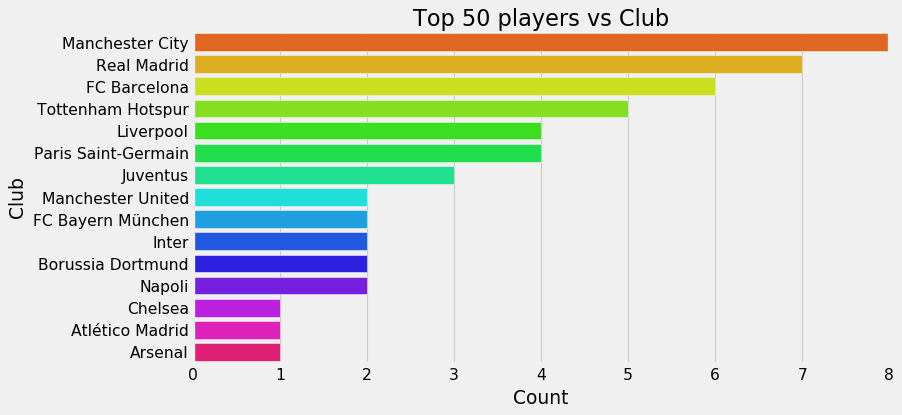

In [87]:
rcParams['figure.figsize'] = 10,5
plt.style.use('fivethirtyeight')
sb.barplot(x = top_50['club'].value_counts().values,y = top_50['club'].value_counts().index,palette='hsv')
plt.title('Top 50 players vs Club')
plt.xlabel('Count')
plt.ylabel('Club')
plt.show()

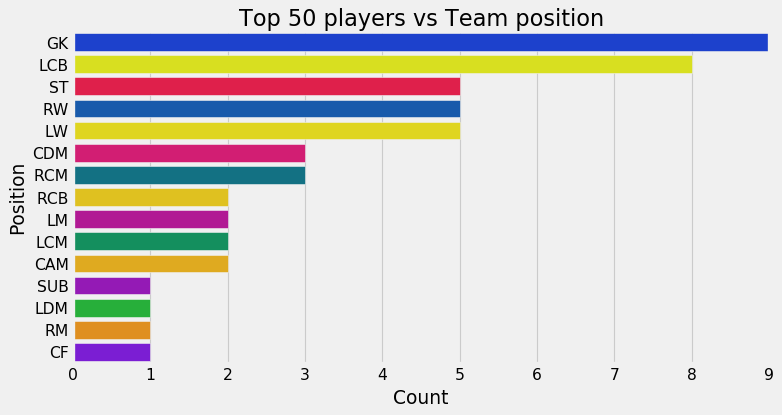

In [88]:
rcParams['figure.figsize'] = 10,5
plt.style.use('fivethirtyeight')
sb.barplot(x = top_50['team_position'].value_counts().values,y = top_50['team_position'].value_counts().index,palette='prism')
plt.title('Top 50 players vs Team position')
plt.xlabel('Count')
plt.ylabel('Position')
plt.show()

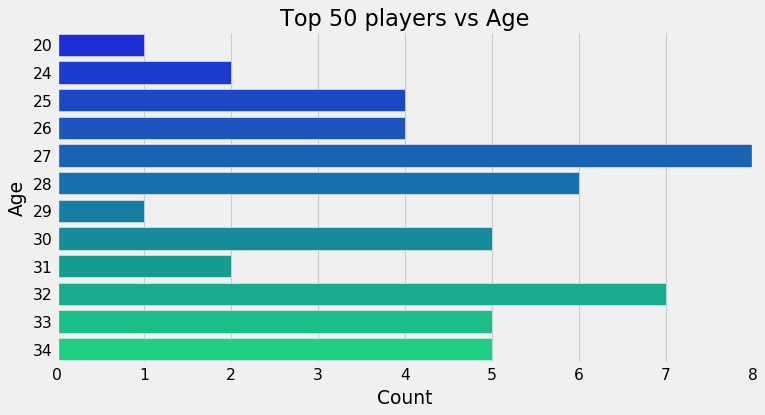

In [89]:
rcParams['figure.figsize'] = 10,5
plt.style.use('fivethirtyeight')
sb.barplot(x = top_50['age'].value_counts().values,y = top_50['age'].value_counts().index,orient='h',palette='winter')
plt.title('Top 50 players vs Age')
plt.xlabel('Count')
plt.ylabel('Age')
plt.show()

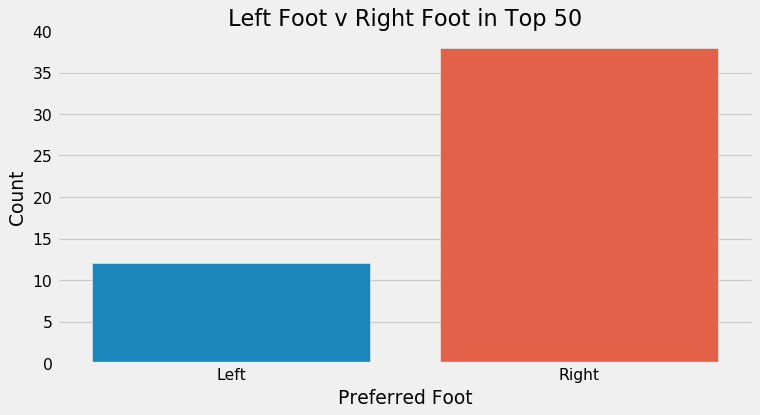

In [90]:
rcParams['figure.figsize'] = 10,5
plt.style.use('fivethirtyeight')
sb.countplot('preferred_foot',data=top_50)
plt.xlabel('Preferred Foot')
plt.ylabel('Count')
plt.title('Left Foot v Right Foot in Top 50')
plt.show()

Text(0.5, 1, 'Top 50 players Age vs Potential')

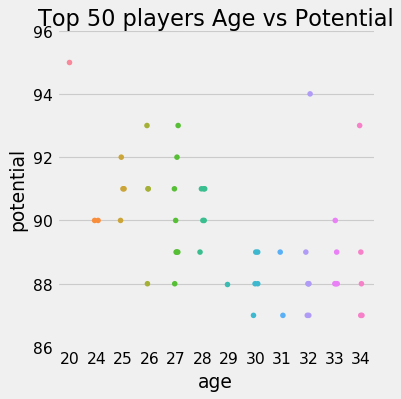

In [91]:
rcParams['figure.figsize'] = 10,5
plt.style.use('fivethirtyeight')
sb.catplot(x = 'age', y = 'potential',data = top_50)
plt.title('Top 50 players Age vs Potential')

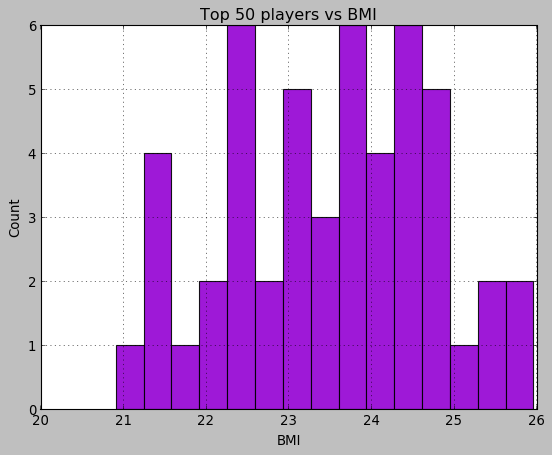

In [92]:
rcParams['figure.figsize'] = 10,5
plt.style.use('_classic_test')
ax = top_50['BMI'].hist(bins = 15,alpha = 0.9,color = 'darkviolet')
ax.set(title = 'Top 50 players vs BMI',xlabel = 'BMI',ylabel = 'Count')
plt.show()


## Modelling

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [94]:
data = pd.read_csv('fifa.csv')
data.head()

,short_name,age,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
0,L. Messi,32,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,...,66,66,66,68,63,52,52,52,63,24.913495
1,Cristiano Ronaldo,34,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,...,61,61,61,65,61,53,53,53,61,23.735308
2,Neymar Jr,27,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,...,61,61,61,66,61,46,46,46,61,22.204082
3,J. Oblak,26,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,...,0,0,0,0,0,0,0,0,0,24.615211
4,E. Hazard,28,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,...,63,63,63,66,61,49,49,49,61,24.163265


In [95]:
data.shape

(18278, 90)

In [96]:
data.corr()

,age,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
age,1.000000,0.464305,-0.262872,0.081513,0.151031,0.259582,0.073988,0.045277,0.068851,-0.182084,...,0.100698,0.100698,0.100698,0.063831,0.066004,0.106685,0.106685,0.106685,0.066004,0.267701
overall,0.464305,1.000000,0.646650,0.638230,0.573578,0.475557,0.230276,0.401261,0.633548,0.144498,...,0.338545,0.338545,0.338545,0.319467,0.306402,0.296840,0.296840,0.296840,0.306402,0.193221
potential,-0.262872,0.646650,1.000000,0.580868,0.475490,0.341221,0.171354,0.328440,0.590917,0.210498,...,0.221533,0.221533,0.221533,0.221246,0.209596,0.180270,0.180270,0.180270,0.209596,-0.016507
value_eur,0.081513,0.638230,0.580868,1.000000,0.858052,0.618133,0.169084,0.303694,0.987396,0.161470,...,0.201279,0.201279,0.201279,0.196741,0.184073,0.161810,0.161810,0.161810,0.184073,0.067430
wage_eur,0.151031,0.573578,0.475490,0.858052,1.000000,0.652061,0.149405,0.263147,0.847933,0.107572,...,0.192732,0.192732,0.192732,0.185500,0.175781,0.161950,0.161950,0.161950,0.175781,0.077489
international_reputation,0.259582,0.475557,0.341221,0.618133,0.652061,1.000000,0.127792,0.199696,0.599016,0.003566,...,0.136588,0.136588,0.136588,0.122015,0.114582,0.114263,0.114263,0.114263,0.114582,0.092781
weak_foot,0.073988,0.230276,0.171354,0.169084,0.149405,0.127792,1.000000,0.343895,0.166813,0.124800,...,0.235697,0.235697,0.235697,0.251656,0.228023,0.178323,0.178323,0.178323,0.228023,0.018884
skill_moves,0.045277,0.401261,0.328440,0.303694,0.263147,0.199696,0.343895,1.000000,0.297023,0.301262,...,0.590709,0.590709,0.590709,0.639228,0.592052,0.475957,0.475957,0.475957,0.592052,-0.010149
release_clause_eur,0.068851,0.633548,0.590917,0.987396,0.847933,0.599016,0.166813,0.297023,1.000000,0.160363,...,0.197278,0.197278,0.197278,0.192599,0.180476,0.158813,0.158813,0.158813,0.180476,0.061558
pace,-0.182084,0.144498,0.210498,0.161470,0.107572,0.003566,0.124800,0.301262,0.160363,1.000000,...,-0.097862,-0.097862,-0.097862,0.011016,-0.029396,-0.182069,-0.182069,-0.182069,-0.029396,-0.052911


In [97]:
data.columns

Index(['short_name', 'age', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'release_clause_eur', 'team_position', 'joined', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_posi

In [104]:
data['pos_overall'] = ""

In [105]:
mapping = {'ls':'pos_overall','st':'pos_overall','rs':'pos_overall','lw':'pos_overall','lf':'pos_overall',
           'cf':'pos_overall','rf':'pos_overall','rw':'pos_overall','lam':'pos_overall','cam':'pos_overall',
           'ram':'pos_overall','lm':'pos_overall','lcm':'pos_overall','cm':'pos_overall','rcm':'pos_overall',
           'rm':'pos_overall','lwb':'pos_overall','ldm':'pos_overall','cdm':'pos_overall','rdm':'pos_overall',
           'rwb':'pos_overall','lb':'pos_overall','lcb':'pos_overall','cb':'pos_overall','rcb':'pos_overall',
           'rb':'pos_overall'}

### Mapping all these positions to a single column as "pos_overall"

In [106]:
data['pos_overall'] = data.groupby(mapping, axis = 1).sum()

In [107]:
data['pos_overall']

0        2072
1        1998
2        1968
3           0
4        1975
         ... 
18273     949
18274     988
18275    1186
18276    1202
18277    1200
Name: pos_overall, Length: 18278, dtype: int64

In [108]:
data.head(2)

,short_name,age,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI,pos_overall
0,L. Messi,32,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,...,66,66,68,63,52,52,52,63,24.913495,2072
1,Cristiano Ronaldo,34,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,...,61,61,65,61,53,53,53,61,23.735308,1998


In [109]:
delete = ['player_positions','release_clause_eur','wage_eur','value_eur','joined','ls', 'st', 'rs',
         'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm','rcm', 'rm', 'lwb',
         'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb','rcb', 'rb','BMI','short_name']

In [110]:
data.drop(delete,axis = 1,inplace = True)

In [111]:
data.head(2)

,age,nationality,club,overall,potential,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pos_overall
0,32,Argentina,FC Barcelona,94,94,Left,5,4,4,Medium/Low,...,96,33,37,26,6,11,15,14,8,2072
1,34,Portugal,Juventus,93,93,Right,5,4,5,High/Low,...,95,28,32,24,7,11,15,14,11,1998


In [112]:
data['work_rate']

0           Medium/Low
1             High/Low
2          High/Medium
3        Medium/Medium
4          High/Medium
             ...      
18273      Medium/High
18274    Medium/Medium
18275       Low/Medium
18276          Low/Low
18277    Medium/Medium
Name: work_rate, Length: 18278, dtype: object

### Splitting work rate into 2 columns.

In [113]:
data[['workrate_1','workrate_2']] = data.work_rate.str.split("/",expand=True,)
data.head(3)

,age,nationality,club,overall,potential,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pos_overall,workrate_1,workrate_2
0,32,Argentina,FC Barcelona,94,94,Left,5,4,4,Medium/Low,...,37,26,6,11,15,14,8,2072,Medium,Low
1,34,Portugal,Juventus,93,93,Right,5,4,5,High/Low,...,32,24,7,11,15,14,11,1998,High,Low
2,27,Brazil,Paris Saint-Germain,92,92,Right,5,5,5,High/Medium,...,26,29,9,9,15,15,11,1968,High,Medium


In [114]:
delete = ['work_rate']
data.drop(delete,axis =1,inplace = True)
data.head(2)

,age,nationality,club,overall,potential,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pos_overall,workrate_1,workrate_2
0,32,Argentina,FC Barcelona,94,94,Left,5,4,4,RW,...,37,26,6,11,15,14,8,2072,Medium,Low
1,34,Portugal,Juventus,93,93,Right,5,4,5,LW,...,32,24,7,11,15,14,11,1998,High,Low


In [115]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [116]:
data['nationality'] = enc.fit_transform(data['nationality'])
data['club'] = enc.fit_transform(data['club'])
data['team_position'] = enc.fit_transform(data['team_position'])
data['preferred_foot'] = enc.fit_transform(data['preferred_foot'])
data['workrate_1'] = enc.fit_transform(data['workrate_1'])
data['workrate_2'] = enc.fit_transform(data['workrate_2'])

In [117]:
data.head()

,age,nationality,club,overall,potential,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pos_overall,workrate_1,workrate_2
0,32,5,224,94,94,0,5,4,4,25,...,37,26,6,11,15,14,8,2072,2,1
1,34,121,350,93,93,1,5,4,5,14,...,32,24,7,11,15,14,11,1998,0,1
2,27,18,462,92,92,1,5,5,5,0,...,26,29,9,9,15,15,11,1968,0,2
3,26,133,63,91,93,1,3,3,1,5,...,12,18,87,92,78,90,89,0,2,2
4,28,12,505,91,91,1,4,4,4,14,...,27,22,11,12,6,8,8,1975,0,2


In [118]:
data.dtypes

age                             int64
nationality                     int32
club                            int32
overall                         int64
potential                       int64
preferred_foot                  int32
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
team_position                   int32
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
gk_diving                     float64
gk_handling                   float64
gk_kicking                    float64
gk_reflexes                   float64
gk_speed                      float64
gk_positioning                float64
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
attacking_short_passing         int64
attacking_vo

In [119]:
data.shape

(18278, 59)

In [120]:
X = data.drop(['overall'],axis = 1)

In [121]:
X.head(2)

,age,nationality,club,potential,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,pace,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pos_overall,workrate_1,workrate_2
0,32,5,224,94,0,5,4,4,25,87.0,...,37,26,6,11,15,14,8,2072,2,1
1,34,121,350,93,1,5,4,5,14,90.0,...,32,24,7,11,15,14,11,1998,0,1


In [122]:
y = data.overall
y.head(2)

0    94
1    93
Name: overall, dtype: int64

## Splitting the data

In [123]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split,cross_val_score,validation_curve,KFold

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.3)

In [125]:
X_train.shape

(12794, 58)

In [126]:
y_train.shape

(12794,)

In [127]:
X_test.shape

(5484, 58)

## Linear Regression

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [129]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
y_predict = model.predict(X_test)

In [131]:
r2_score(y_test,y_predict).round(4)*100

93.74

In [132]:
y_test

11854    64
2647     74
5945     69
6798     68
12985    63
         ..
5161     70
7207     68
866      78
3344     72
4301     71
Name: overall, Length: 5484, dtype: int64

In [133]:
y_predict

array([64.84381018, 75.54078728, 67.8108291 , ..., 79.54768086,
       72.05136797, 68.6803859 ])

## Decision Tree Regressor

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [135]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [136]:
y_predict = model.predict(X_test)

In [137]:
r2_score(y_test,y_predict).round(4)*100

94.71000000000001

In [138]:
y_test

11854    64
2647     74
5945     69
6798     68
12985    63
         ..
5161     70
7207     68
866      78
3344     72
4301     71
Name: overall, Length: 5484, dtype: int64

In [139]:
y_predict

array([66., 74., 67., ..., 78., 77., 71.])

## Random Forest Regressor

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [141]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [142]:
y_predict = model.predict(X_test)

In [143]:
r2_score(y_test,y_predict).round(4)*100

97.57000000000001

In [144]:
y_test

11854    64
2647     74
5945     69
6798     68
12985    63
         ..
5161     70
7207     68
866      78
3344     72
4301     71
Name: overall, Length: 5484, dtype: int64

In [145]:
y_predict

array([64. , 74. , 68.9, ..., 78. , 73. , 71.4])

## Gradient Boosting Regressor

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [147]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [148]:
y_predict = model.predict(X_test)

In [149]:
r2_score(y_test,y_predict).round(4)*100

96.94

In [150]:
y_test

11854    64
2647     74
5945     69
6798     68
12985    63
         ..
5161     70
7207     68
866      78
3344     72
4301     71
Name: overall, Length: 5484, dtype: int64

In [151]:
y_predict

array([63.97803077, 73.92049626, 70.21490292, ..., 77.99639375,
       72.51903419, 71.76558574])

## Support Vector Regression

In [152]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [153]:
y_predict = model.predict(X_test)

In [154]:
r2_score(y_test,y_predict).round(4)*100

0.0

In [155]:
y_test

11854    64
2647     74
5945     69
6798     68
12985    63
         ..
5161     70
7207     68
866      78
3344     72
4301     71
Name: overall, Length: 5484, dtype: int64

In [156]:
y_predict

array([66.19878283, 66.19878283, 66.19878283, ..., 66.19878283,
       66.19878283, 66.19878283])

## Among all Random Forest Regressor did a good job with the score of 98

- Trying hyper parameter tuning for a better score.

In [157]:
n_estimators = [90,100,110]
max_features = ['auto','sqrt','log2']
max_depth = [5,10,15]
max_depth.append(None)
min_samples_split = [2,5,8]
min_samples_leaf = [1,2]

In [158]:
grid_param = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [159]:
from sklearn.model_selection import RandomizedSearchCV
RFR = RandomForestRegressor()
RFR_random = RandomizedSearchCV(estimator = RFR,
                               param_distributions = grid_param,n_iter = 10,
                               cv = 5,verbose = 2,random_state = 42,n_jobs = -1)
RFR_random.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [160]:
print(RFR_random.best_params_)

{'n_estimators': 110, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [161]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [162]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=110,min_samples_split=2,min_samples_leaf=1,max_features='sqrt')
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=110,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [163]:
y_predict = model.predict(X_test)

In [164]:
r2_score(y_test,y_predict).round(4)*100

98.17

### A little bit accuracy improved after tuning from 97.57 to 98.17

 # [Start of NoteBook](#6)
 - Click above to go to top.